In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


# 1. Import Data

In [2]:
df_movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
print(f'df_movies is imported. shape = {df_movies.shape}')

df_movies is imported. shape = (45466, 24)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### df_movies investigation

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### df_movies pre-processing

In [5]:
df_movies.dropna(subset=['vote_average', 'vote_count'], inplace=True)
df_movies['id'] = df_movies.id.astype('int')

In [6]:
# genres column is in string type. Need to transform as string tags.
from ast import literal_eval
df_movies['genres'] = df_movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [x_dict['name'] for x_dict in x])

# 2. Top Movies by votes rating

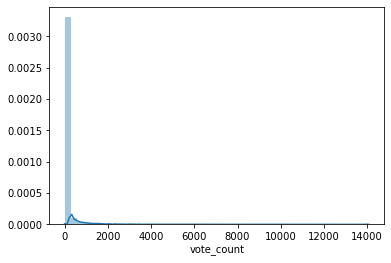

In [7]:
import seaborn as sns
vote_hist = sns.distplot(df_movies.vote_count)

### Top Movies defined by the trimmed count-weighted vote_average

Seems the distribution is skewful - many votes no. is small - not being representative to the movies <br>
movies will be trimmed by, says, 95% tile of votes. <br>

m is the min vote_count for valid movies <br>
for those invalid movies, estimate them as C = overall average vote ratings

In [8]:
def weighted_rating(x, m, C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

In [9]:
def scoring_df_movies(df_movies, genre=None, quantile=0.95):
    if genre is None:
        df_movies_scored = df_movies.copy()
    else:
        df_movies_scored = df_movies[df_movies.genres.apply(lambda x: genre in x)]
    
    m = df_movies_scored.vote_count.quantile(quantile)
    C = df_movies_scored.vote_average.mean()

    df_movies_scored.query(f'`vote_count` > {m}', inplace=True)

    df_movies_scored['movie_score'] = df_movies_scored.apply(weighted_rating, m=m, C=C, axis=1)
    df_movies_scored.sort_values('movie_score', ascending=False, inplace=True)

    return df_movies_scored

### Top Movies

In [10]:
scoring_df_movies(df_movies).head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movie_score
314,False,NaN,25000000,"[Drama, Crime]",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,8.357746
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[Drama, Crime]",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,8.306334
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.208376
2843,False,NaN,63000000,[Drama],http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0,8.184899
292,False,NaN,8000000,"[Thriller, Crime]",NaN,680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",...,2.139288e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,False,8.3,8670.0,8.172155


In [11]:
scoring_df_movies(df_movies, genre='Romance', quantile=0.85).head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movie_score
10309,False,NaN,13200000,"[Comedy, Drama, Romance]",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,100000000.0,190.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0,8.701372
40251,False,NaN,0,"[Romance, Animation, Drama]",https://www.funimationfilms.com/movie/yourname/,372058,tt5311514,ja,君の名は。,High schoolers Mitsuha and Taki are complete s...,...,355298270.0,106.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Your Name.,False,8.5,1030.0,8.281258
351,False,NaN,55000000,"[Comedy, Drama, Romance]",NaN,13,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,...,677945399.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The world will never be the same, once you've ...",Forrest Gump,False,8.2,8147.0,8.173547
1132,False,NaN,0,"[Drama, Romance]",NaN,11216,tt0095765,it,Nuovo Cinema Paradiso,"A filmmaker recalls his childhood, when he fel...",...,11990401.0,124.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,"A celebration of youth, friendship, and the ev...",Cinema Paradiso,False,8.2,834.0,7.964387
40882,False,NaN,30000000,"[Comedy, Drama, Music, Romance]",http://www.lalaland.movie/,313369,tt3783958,en,La La Land,"Mia, an aspiring actress, serves lattes to mov...",...,445435700.0,128.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Here's to the fools who dream.,La La Land,False,7.9,4745.0,7.860576


# 3. Content Based Recommender
Given a movie name, output a list of movies

### Use links_small as the base of this demo

In [12]:
df_links = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')

In [13]:
df_links.dropna(subset=['tmdbId'], inplace=True)
df_links['tmdbId'] = df_links['tmdbId'].astype('int')

In [14]:
df_links['tmdbId'].astype('int', copy=False)

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int64

In [15]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9112 non-null   int64
 1   imdbId   9112 non-null   int64
 2   tmdbId   9112 non-null   int64
dtypes: int64(3)
memory usage: 284.8 KB


In [16]:
# df_movies is trimmed as df_links_small used
df_movies_small = df_movies[df_movies.id.isin(df_links.tmdbId)]

In [17]:
df_movies_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 45265
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9099 non-null   object 
 1   belongs_to_collection  1674 non-null   object 
 2   budget                 9099 non-null   object 
 3   genres                 9099 non-null   object 
 4   homepage               1974 non-null   object 
 5   id                     9099 non-null   int64  
 6   imdb_id                9099 non-null   object 
 7   original_language      9099 non-null   object 
 8   original_title         9099 non-null   object 
 9   overview               9087 non-null   object 
 10  popularity             9099 non-null   object 
 11  poster_path            9096 non-null   object 
 12  production_companies   9099 non-null   object 
 13  production_countries   9099 non-null   object 
 14  release_date           9099 non-null   object 
 15  rev

### 3.1 Movie Description Based Recommender

In [18]:
# Preprocess for "Description"

df_movies_small['tagline'] = df_movies_small['tagline'].fillna('')
df_movies_small['description'] = (df_movies_small['overview'] + df_movies_small['tagline']).fillna('')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df_movies_small['description'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: description, dtype: object

### Embedding Description using TFIDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidfer.fit_transform(df_movies_small.description)

print(tfidf_matrix.shape)

(9099, 268124)


### Movies Relationship Score - Linear Kernel
We can use cosine sim, or easier: Linear Kernel. [Link](https://scikit-learn.org/stable/modules/metrics.html#)

In [21]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# movies_rel_scores = linear_kernel(tfidf_matrix, tfidf_matrix)
movies_rel_scores = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(movies_rel_scores.shape)

(9099, 9099)


In [22]:
def get_recommendations(title, df_movies_small, movies_rel_scores):
    df_movies_small = df_movies_small.reset_index()
    indices = pd.Series(df_movies_small.index, index=df_movies_small.title)
    idx = indices[title]
    df_sim_scores = pd.DataFrame(list(enumerate(movies_rel_scores[idx])), columns=['movie_index', 'movie_score']) \
        .sort_values('movie_score', ascending=False).iloc[1:,]
    return pd.concat([df_movies_small.title.iloc[df_sim_scores.movie_index], df_sim_scores], axis=1)

In [23]:
get_recommendations('The Godfather', df_movies_small, movies_rel_scores).head(10)

,title,movie_index,movie_score
973,The Godfather: Part II,973,0.220060
8387,The Family,8387,0.100294
3509,Made,3509,0.067618
4196,Johnny Dangerously,4196,0.065622
29,Shanghai Triad,29,0.056142
5667,Fury,5667,0.056028
2412,American Movie,2412,0.055023
1582,The Godfather: Part III,1582,0.050235
4221,8 Women,4221,0.047508
2159,Summer of Sam,2159,0.045952


In [24]:
get_recommendations('The Dark Knight', df_movies_small, movies_rel_scores).head(10)

,title,movie_index,movie_score
7931,The Dark Knight Rises,7931,0.171374
132,Batman Forever,132,0.122444
1113,Batman Returns,1113,0.100890
8227,"Batman: The Dark Knight Returns, Part 2",8227,0.084762
7565,Batman: Under the Red Hood,7565,0.084197
524,Batman,524,0.081623
7901,Batman: Year One,7901,0.077807
2579,Batman: Mask of the Phantasm,2579,0.069629
2696,JFK,2696,0.061759
8165,"Batman: The Dark Knight Returns, Part 1",8165,0.060949


### 3.2 Metadata Based Recommender

Merging Credits and Keywords into Movies dataset

In [25]:
df_credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
df_keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')

In [26]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [27]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [28]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [29]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [30]:
df_movies.merge(df_keywords, on='id').shape

(46478, 25)

In [31]:
# df_movies is trimmed as df_links_small used
df_movies_small = df_movies.merge(df_credits, on='id').merge(df_keywords, on='id')
df_movies_small = df_movies_small[df_movies_small.id.isin(df_links.tmdbId)]
print(df_movies_small.shape)

(9219, 27)


This moment we focus on Cast / Crew / Keywords.

In [32]:
df_movies_small['cast'] = df_movies_small['cast'].apply(literal_eval)
df_movies_small['cast_size'] = df_movies_small['cast'].apply(lambda x: len(x))
df_movies_small['cast'] = df_movies_small['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
# summarize the top 3 casts
df_movies_small['cast'] = df_movies_small['cast'].apply(lambda x: x[:3] if len(x) >=3 else x) \
    .apply(lambda x: [str.lower(i.replace(" ", "")) for i in x]) # Lower case without space

df_movies_small['crew'] = df_movies_small['crew'].apply(literal_eval)
df_movies_small['crew_size'] = df_movies_small['crew'].apply(lambda x: len(x))


And getting the director's name.

In [33]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Lower case without space
# 3 times to give it more weight relative to the entire cast
df_movies_small['director'] = df_movies_small['crew'].apply(get_director) \
    .astype('str').apply(lambda x: str.lower(x.replace(" ", ""))) \
    .apply(lambda x: [x]*3) 

In [34]:
df_movies_small[['cast', 'cast_size', 'crew', 'crew_size', 'director']].head()

,cast,cast_size,crew,crew_size,director
0,"[tomhanks, timallen, donrickles]",13,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[johnlasseter, johnlasseter, johnlasseter]"
1,"[robinwilliams, jonathanhyde, kirstendunst]",26,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,"[joejohnston, joejohnston, joejohnston]"
2,"[waltermatthau, jacklemmon, ann-margret]",7,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,"[howarddeutch, howarddeutch, howarddeutch]"
3,"[whitneyhouston, angelabassett, lorettadevine]",10,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,"[forestwhitaker, forestwhitaker, forestwhitaker]"
4,"[stevemartin, dianekeaton, martinshort]",12,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,"[charlesshyer, charlesshyer, charlesshyer]"


And Keywords.

In [35]:
df_movies_small['keywords'] = df_movies_small['keywords'].apply(literal_eval)
df_movies_small['keywords'] = df_movies_small['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [36]:
df_movies_small.keywords

0        [jealousy, toy, boy, friendship, friends, riva...
1        [board game, disappearance, based on children'...
2        [fishing, best friend, duringcreditsstinger, o...
3        [based on novel, interracial relationship, sin...
4        [baby, midlife crisis, confidence, aging, daug...
                               ...                        
40948                           [friendship, brick making]
41168                                          [bollywood]
41221                                          [bollywood]
41387    [monster, godzilla, giant monster, destruction...
41665                                 [music, documentary]
Name: keywords, Length: 9219, dtype: object

Keyword distribution analysis

In [37]:
s = df_movies_small.apply(lambda x: pd.Series(x['keywords']),axis=1).stack() \
    .reset_index(level=1, drop=True) \
    .value_counts()
s = s[s > 1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [38]:
s

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
                       ... 
siam                      2
whistleblower             2
sleigh                    2
romanian new wave         2
pleasure                  2
Length: 6709, dtype: int64

Filter Keyword with stemming, and lower case.

In [39]:
def filter_keywords(x, s):
    words = [i for i in x if i in s]
    return words

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
df_movies_small['keywords'] = df_movies_small['keywords'].apply(filter_keywords, s=s) \
    .apply(lambda x: [stemmer.stem(i) for i in x]) \
    .apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [40]:
df_movies_small.keywords

0        [jealousi, toy, boy, friendship, friend, rival...
1        [boardgam, disappear, basedonchildren'sbook, n...
2                   [fish, bestfriend, duringcreditssting]
3        [basedonnovel, interracialrelationship, single...
4        [babi, midlifecrisi, confid, age, daughter, mo...
                               ...                        
40948                                         [friendship]
41168                                          [bollywood]
41221                                          [bollywood]
41387     [monster, godzilla, giantmonst, destruct, kaiju]
41665                                 [music, documentari]
Name: keywords, Length: 9219, dtype: object

Integrate all the features together.

In [41]:
df_movies_small['soup'] = (df_movies_small['keywords'] + df_movies_small['cast'] + df_movies_small['director'] + df_movies_small['genres']) \
    .apply(lambda x: ' '.join(x))

In [42]:
df_movies_small['soup'].head()

0    jealousi toy boy friendship friend rivalri boy...
1    boardgam disappear basedonchildren'sbook newho...
2    fish bestfriend duringcreditssting waltermatth...
3    basedonnovel interracialrelationship singlemot...
4    babi midlifecrisi confid age daughter motherda...
Name: soup, dtype: object

### Embedding Metadata ("Soup") using Counts

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = counter.fit_transform(df_movies_small.soup)

print(count_matrix.shape)

(9219, 107377)


### Movies Relationship Score

In [44]:
movies_rel_scores = cosine_similarity(count_matrix, count_matrix)
print(movies_rel_scores.shape)

(9219, 9219)


In [45]:
get_recommendations('The Dark Knight', df_movies_small, movies_rel_scores).head(10)

,title,movie_index,movie_score
8031,The Dark Knight Rises,8031,0.492757
6218,Batman Begins,6218,0.468576
6623,The Prestige,6623,0.343754
2085,Following,2085,0.295840
7648,Inception,7648,0.271385
4145,Insomnia,4145,0.265789
3381,Memento,3381,0.248069
8613,Interstellar,8613,0.204219
7659,Batman: Under the Red Hood,7659,0.203390
1134,Batman Returns,1134,0.187412


In [46]:
get_recommendations('Mean Girls', df_movies_small, movies_rel_scores).head(10)

,title,movie_index,movie_score
3319,Head Over Heels,3319,0.462250
4763,Freaky Friday,4763,0.388650
6277,Just Like Heaven,6277,0.384615
1329,The House of Yes,1329,0.384615
7905,Mr. Popper's Penguins,7905,0.375117
7332,Ghosts of Girlfriends Past,7332,0.368549
6959,The Spiderwick Chronicles,6959,0.310316
8883,The DUFF,8883,0.153846
6698,It's a Boy Girl Thing,6698,0.129550
7377,"I Love You, Beth Cooper",7377,0.125039


### 3.3 Top Score Recommendation after Content-Based Filtering
Firstly, find the top M scores from content-based filtering. <br>
Then, Sort according to the weighted vote score.

In [47]:
def get_recommendations_from_votes(title, df_movies, movies_rel_scores, nCBFs, vote_quantile):
    CBF_recommended = get_recommendations(title, df_movies, movies_rel_scores).head(nCBFs)
    CBF_titles = CBF_recommended.title
    df_movies_CBF = df_movies[df_movies.title.isin(CBF_titles)]
    return scoring_df_movies(df_movies_CBF, quantile=vote_quantile)

In [48]:
dict_param = {'df_movies': df_movies_small, 'movies_rel_scores': movies_rel_scores, 'nCBFs': 25, 'vote_quantile': 0.6}
get_recommendations_from_votes('The Dark Knight', **dict_param)[['title', 'vote_count', 'vote_average', 'movie_score']]

,title,vote_count,vote_average,movie_score
15651,Inception,14075.0,8.1,7.993409
23075,Interstellar,11187.0,8.1,7.968520
4126,Memento,4168.0,8.1,7.795991
11463,The Prestige,4510.0,8.0,7.735012
18442,The Dark Knight Rises,9263.0,7.6,7.500838
10210,Batman Begins,7511.0,7.5,7.394438
1349,Batman Returns,1706.0,6.6,6.650348
150,Batman Forever,1529.0,5.2,5.863747
31280,Batman v Superman: Dawn of Justice,7189.0,5.7,5.844355
1511,Batman & Robin,1447.0,4.2,5.333848


In [49]:
get_recommendations_from_votes('Mean Girls', **dict_param)[['title', 'vote_count', 'vote_average', 'movie_score']]

,title,vote_count,vote_average,movie_score
1879,The Breakfast Club,2189.0,7.8,7.543356
436,Dazed and Confused,588.0,7.4,6.877699
27878,The DUFF,1372.0,6.8,6.641910
4612,The Princess Diaries,1063.0,6.5,6.387517
10422,Just Like Heaven,595.0,6.5,6.333669
12524,The Spiderwick Chronicles,593.0,6.3,6.211762
6513,Freaky Friday,919.0,6.0,6.022046
2392,She's All That,425.0,5.7,5.877656
17472,Mr. Popper's Penguins,775.0,5.7,5.823942
13994,Ghosts of Girlfriends Past,716.0,5.6,5.765424


# 4. Collaborative Filtering

### Import Ratings

In [50]:
df_ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [51]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Import the Recommender package - Surprise

In [52]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection.validation import cross_validate

reader = Reader()
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8944  0.8968  0.9015  0.8987  0.8919  0.8967  0.0033  
MAE (testset)     0.6893  0.6924  0.6924  0.6934  0.6855  0.6906  0.0029  
Fit time          8.76    8.87    8.86    8.98    8.85    8.86    0.07    
Test time         0.26    0.40    0.26    0.34    0.41    0.34    0.06    


{'test_rmse': array([0.89442378, 0.89676707, 0.90147306, 0.89870364, 0.89194357]),
 'test_mae': array([0.6892653 , 0.69242912, 0.69241913, 0.69335506, 0.68546358]),
 'fit_time': (8.759292125701904,
  8.865005254745483,
  8.858376026153564,
  8.97715711593628,
  8.846213340759277),
 'test_time': (0.2621779441833496,
  0.40216755867004395,
  0.26241040229797363,
  0.34165406227111816,
  0.4101834297180176)}

Average RMSE 0.8968 - good enough to train in fullset

In [53]:
trainset = data.build_full_trainset()
algo.fit(trainset)

Predict the rating given the user and movid id

In [54]:
uid = str(1) # user ID
iid = str(302) # movie ID
pred = algo.predict(uid, iid, verbose=True)

user: 1          item: 302        r_ui = None   est = 3.54   {'was_impossible': False}


# 5. Conclusion - Hybrid (Collabrate Filtering Score after Content Base Filtering)

In [55]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
    
id_map = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(df_movies_small[['title', 'id']], on='id').set_index('title')
id_map['id'] = id_map['id'].astype('int')

In [56]:
id_map

,movieId,id
title,,
Toy Story,1,862
Jumanji,2,8844
Grumpier Old Men,3,15602
Waiting to Exhale,4,31357
Father of the Bride Part II,5,11862
...,...,...
The Last Brickmaker in America,161944,159550
Rustom,162542,392572
Mohenjo Daro,162672,402672


In [57]:
def hybrid(userId, title, id_map, df_movies, movies_rel_scores, nCBFs):
    
    indices_map = id_map.set_index('id')
    
    tmdbId = id_map.loc[title]['id']
    movie_id = id_map.loc[title]['movieId']
    
    CBF_recommended = get_recommendations(title, df_movies, movies_rel_scores).head(nCBFs)
    CBF_titles = CBF_recommended.title
    df_movies_CBF = df_movies[df_movies.title.isin(CBF_titles)]
    
    movies = df_movies_CBF[['title', 'vote_count', 'vote_average',  'id']]
    movies['est'] = movies['id'].apply(lambda x: algo.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies

In [58]:
dict_param = {'id_map': id_map, 'df_movies': df_movies_small, 'movies_rel_scores': movies_rel_scores, 'nCBFs': 25}
hybrid(1, title='Avatar', **dict_param).head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,title,vote_count,vote_average,id,est
1216,The Terminator,4208.0,7.4,218,3.091543
23554,X-Men: Days of Future Past,6155.0,7.5,127585,3.062526
21122,Star Trek Into Darkness,4479.0,7.4,54138,3.039442
1954,Darby O'Gill and the Little People,35.0,6.7,18887,2.999822
2402,Fantastic Planet,140.0,7.6,16306,2.906560
582,Terminator 2: Judgment Day,4274.0,7.7,280,2.893234
1659,Titanic,7770.0,7.5,597,2.783828
12993,Star Wars: The Clone Wars,434.0,5.8,12180,2.773947
2002,Return from Witch Mountain,38.0,5.6,14822,2.768705
1179,Aliens,3282.0,7.7,679,2.754359


In [59]:
hybrid(500, title='Avatar', **dict_param).head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,title,vote_count,vote_average,id,est
23554,X-Men: Days of Future Past,6155.0,7.5,127585,3.369193
1659,Titanic,7770.0,7.5,597,3.360472
1179,Aliens,3282.0,7.7,679,3.245059
21122,Star Trek Into Darkness,4479.0,7.4,54138,3.210479
2402,Fantastic Planet,140.0,7.6,16306,3.179197
2002,Return from Witch Mountain,38.0,5.6,14822,3.142306
13710,Dragonball Evolution,475.0,2.9,14164,3.091213
6912,Hercules in New York,63.0,3.7,5227,2.920004
3712,Sinbad and the Eye of the Tiger,39.0,6.3,11940,2.917309
1113,The Abyss,822.0,7.1,2756,2.910822
